# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: September 12, 2025**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

The purpose of this experiment is to test whether the length of aging (3, 4, or 5 weeks) has an effect on the bitterness level (measured in IBUs) of the new IPA

**Question 2.** Specify the outcome variable

International Bitterness Units (IBUs) of the beer, which quantify bitterness.

**Question 3.** Specify the independent variable. What are some possible lurking variables?

Independent variable (factor being tested): the aging time of the beer, with three levels: 3 weeks, 4 weeks, and 5 weeks.
Possible lurking variables (uncontrolled factors that could influence results):
Slight differences in storage conditions (temperature, light exposure, humidity).
Variations in bottle filling or sealing.
Measurement error from the spectrophotometer.
Differences in how the batch was mixed or distributed across tanks.


**Question 4.** Briefly explain why a completely randomized design is appropriate for this experiment.

A completely randomized design is appropriate because all the bottles come from the same initial batch of beer, so the raw material is consistent. By randomly assigning bottles to different aging times, we avoid systematic bias and make sure that any differences in bitterness are due to aging time rather than other hidden factors.

**Question 5.** State the null and alternative hypotheses for this experiment.


(H₀): The mean IBU is the same for all three aging times (aging time does not affect bitterness).
(Hₐ): At least one aging time has a different mean IBU (aging time does affect bitterness).

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

Ha, At least one aging time has a different mean IBU.

In [ ]:
import os
import pandas as pd

# Change to the HW1 folder
os.chdir("/content/STAT-7220-Applied-Experimental-Design/Assignments/HW1")

# Now "IPA.xlsx" works directly
ipa = pd.read_excel("IPA.xlsx")

ipa.info()
ipa.head()
ipa.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


,IBU
count,30.000000
mean,59.204000
std,14.518316
min,39.040000
25%,46.515000
50%,58.655000
75%,65.795000
max,90.320000


**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?



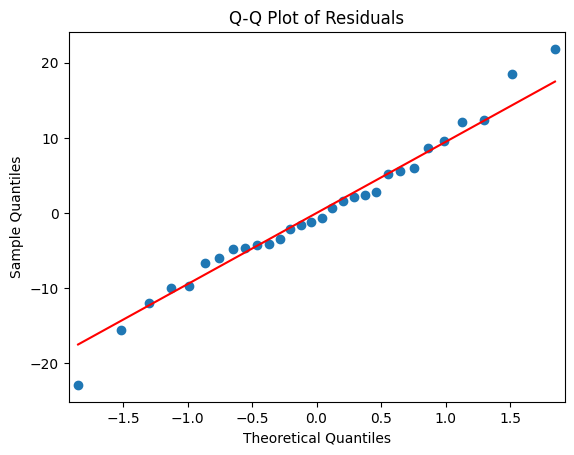

ShapiroResult(statistic=np.float64(0.9876508728828111), pvalue=np.float64(0.9734239573476953))

In [3]:
import os
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

# Change to the HW1 folder
os.chdir("/content/STAT-7220-Applied-Experimental-Design/Assignments/HW1")

# Load the data
ipa = pd.read_excel("IPA.xlsx")


# Fit ANOVA model
model = ols('IBU ~ C(Weeks)', data=ipa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# Q-Q plot
sm.qqplot(model.resid, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

shapiro_test = shapiro(model.resid)
shapiro_test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?



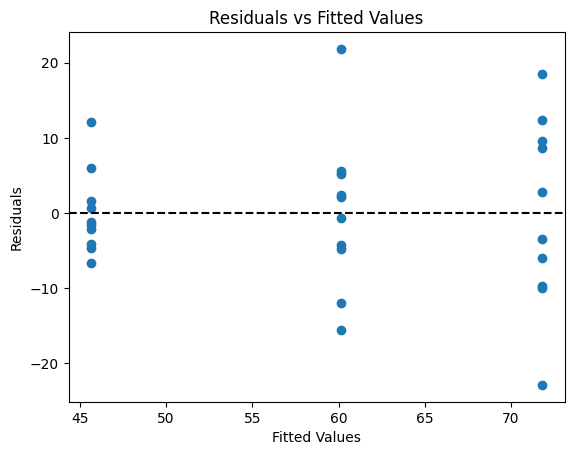

LeveneResult(statistic=np.float64(3.1376837194743215), pvalue=np.float64(0.05953223790866981))

In [5]:
fitted_vals = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()
from scipy.stats import levene

group3 = ipa[ipa["Weeks"] == "3 Weeks"]["IBU"]
group4 = ipa[ipa["Weeks"] == "4 Weeks"]["IBU"]
group5 = ipa[ipa["Weeks"] == "5 Weeks"]["IBU"]

levene_test = levene(group3, group4, group5)
levene_test

**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?



In [6]:
anova_table


,sum_sq,df,F,PR(>F)
C(Weeks),3428.75378,2.0,17.246546,0.000015
Residual,2683.90994,27.0,NaN,NaN


**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.


In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=ipa['IBU'], groups=ipa['Weeks'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
3 Weeks 4 Weeks   14.507 0.0083  3.4518 25.5622   True
3 Weeks 5 Weeks   26.134    0.0 15.0788 37.1892   True
4 Weeks 5 Weeks   11.627 0.0378  0.5718 22.6822   True
------------------------------------------------------



**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses.

In [2]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "christinatalerico13"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

print("💡 Please fork the repo to your own account and update 'github_username' above.")


# Set Today's Directory #

today_dir = "Assignments"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/christinatalerico13/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/christinatalerico13/STAT-7220-Applied-Experimental-Design.git
💡 Please fork the repo to your own account and update 'github_username' above.
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments
